In [10]:
from t_graph import TGraph, TEdge, TNode, WeightedGraphFactory
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import seaborn as sns

from measure import measure_performance, PerformanceMeasure


In [2]:
def create_log_grid(max_vertices, num_points_V, num_points_E):
    vertices = np.logspace(1, np.log10(max_vertices), num_points_V, dtype=int)
    edges_completeness = np.logspace(start=-2, stop=0, num=num_points_E, base=10, endpoint=True)
    edges_completeness.put(0, 0.0)

    assert len(edges_completeness) == num_points_E
    assert len(vertices) == num_points_V

    v_mesh, e_mesh = np.meshgrid(vertices, edges_completeness)
    e_mesh = np.round(e_mesh * v_mesh * (v_mesh - 1) / 2).astype(int)
    v_mesh = v_mesh.flatten()
    e_mesh = e_mesh.flatten()
        
    return v_mesh, e_mesh, edges_completeness


In [18]:
max_vertices = 1000
num_points_v = 10
num_points_e = 20

vertices, edges, edges_completeness = create_log_grid(max_vertices, num_points_v, num_points_e)
print(vertices.shape)
print(edges.shape)

(200,)
(200,)


In [19]:
@measure_performance
def measure_prims_performance(graph: TGraph, root_id: int) -> PerformanceMeasure:
    return graph.prims_mst(root_id)

@measure_performance
def measure_kruskal_performance(graph: TGraph, root_id) -> PerformanceMeasure:
    return graph.kruskal_mst(root_id)

def execute_experiments(graph: TGraph, measure_func: callable, num_experimets=10):
    n_vertices = graph.get_num_vertices()
    root_vertices = np.random.randint(0, n_vertices, num_experimets)
    results = [ measure_func(graph, root)[1].__dict__ for root, _ in zip(root_vertices, range(num_experimets)) ]
    
    return results

In [20]:
graph_factory = WeightedGraphFactory(vertices, edges, 100, 0)

In [21]:

kruskal_data = []
for g in tqdm(graph_factory):
    kruskal_data.extend(execute_experiments(g, measure_kruskal_performance))
    
kruskal_df = pd.DataFrame.from_records(kruskal_data)
kruskal_df.set_index(['input_V', 'input_E'], inplace=True)

0it [00:00, ?it/s]

200it [11:41,  3.51s/it]


In [24]:
# kruskal_df.to_csv('./outputs/kruskal.bkp.csv')

/tmp/ipykernel_17680/2644839622.py:2: FutureWarning: The provided callable <function mean at 0x7f0c79fb1a80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = kruskal_df.pivot_table(index='input_V', columns='input_E', values='cpu_time', aggfunc=np.mean)


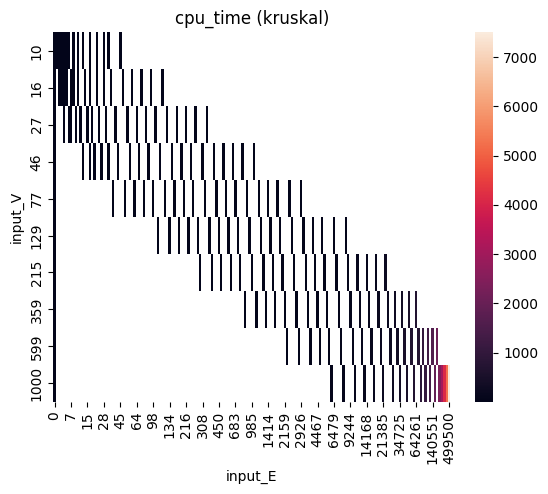

In [64]:
# Reshape the data for heatmap
heatmap_data = kruskal_df.pivot_table(index='input_V', columns='input_E', values='cpu_time', aggfunc=np.mean)

# Plot the heatmap
sns.heatmap(heatmap_data)

# Set the axis labels
plt.xlabel('input_E')
plt.ylabel('input_V')
plt.title('cpu_time (kruskal)')

# Show the plot
plt.show()


In [63]:
sns.scatterplot(data=kruskal_df, x='root_node', y='cpu_time')
plt.xlabel('Root Node')
plt.ylabel('CPU Time')
plt.grid(True)
plt.show()

print(f"pearson coef for cpu_time and root_node: {kruskal_df['cpu_time'].corr(kruskal_df['root_node'])}")


ValueError: Length of tuple vectors must match length of `data` when both are used, but `data` has length 2000 and the vector passed to `x` has length 2.